# Trabajo Integrador - Electrocardiograma (Sintetizado)
Esta versión del Notebook posee solo los scripts finales y una breve explicación
***
## Obtención de Archivo
El siguiente script es para descargar el archivo dado en la problematica
Este script es el mismo dado en la clase 3 solo que se le cambió la url

In [1]:
import requests

def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)

wget("https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx")

***
## Librerias
Para realizar este Trabajo se utilizaron 3 librerias, dos de las cuales fueron vistas en el curso

In [2]:
import matplotlib.pyplot as plt
import scipy.signal as scp
import pandas as pd

***
## Funciones
Para simplificar y tratar de hacer el programa mas comprensible se dividió ciertos procesos extensos en funciones
### Funcion de ploteo de graficos
La primer función *ploteo()* permite simplificar en el programa final el ploteo de graficos, en este caso el de la señal
La segunda *pk_plot* detecta los picos de una señal y los grafica
Cabe aclarar que la funcion plt.show() no está dentro de las funciones porque lo que se pueden preparar varios graficos antes de mostrarlos

In [3]:
#funcion para preparar el plot de un grafico
def ploteo(x,y,lt=0,xl=0,yl=0,tl=0): #eje x, eje y, tipo de linea,label x,label y, titulo del grafico
    #Si un titulo para el grafico se declarado lo agrego
    if tl:
        plt.title(tl)
    #Si un label para el eje x fue declarado, lo agrego
    if xl:
        plt.xlabel(xl)
    #Si un label para el eje y fue declarado, lo agrego
    if yl:
        plt.ylabel(yl)
    #Si se requiere un tipo de linea en especifico se lo agrego
    if lt:
        plt.plot(x,y,lt)
    #Caso contrario, uso el tipo de linea predeterminado
    else:
        plt.plot(x,y)

#funcion para detectar los picos de una señal y añadirlos al plot
def pk_plot(signal,indices,p=0): #eje y, eje x, valor de prominencia
    ypicos=list()
    xpicos=list()
    #Si se le da un valor de prominencia lo aplico a la detección
    if p:
        picos=scp.find_peaks(signal,prominence=p)
    else:
        picos=scp.find_peaks(signal)
    index=picos[0]
    for i in index:
        xpicos.append(indices[i])
    
    for h in range(len(xpicos)):
        ypicos.append(signal[index[h]])
    plt.plot(xpicos,ypicos,"ro")
    return index

### Calculos en relacion a las Frecuencias
1. La funcion F_Car() toma como parametro una lista con distintos periodos entre latido y latido y calcula la frecuencia promedio
2. La función estado toma como parametro la frecuencia cardiaca y los datos del paciente para calcular la Frecuencia cardiaca maxima y en base a ella y la frecuencia medida anteriormente determinar que tanta actividad estaba haciendo el paciente

In [4]:
#Funcion sencilla para calcular la frecuencia cardiaca promedio, 
# toma como parametro todos los intervalos medidos
def F_Car(periodo):
    #Primero guardaremos las frecuencias parciales en una lista
    frecuencia=list()
    
    prom=float()
    
    #Hacemos el calculo de frecuencia con cada elemento del parametro recibido y lo guardamos en la lista "frecuencia"
    for x in periodo:
        frecuencia.append(float(60/x))
    #acumulamos todas las frecuencias parciales
    for y in frecuencia:
        prom+=y
    #Y las dividimos sobre la cantidad de frecuencias obtenidas y obtenemos el promedio final
    prom/=len(frecuencia)
    
    #retornamos el valor del promedio
    return prom


#Funcion para calcular el nivel de actividad del paciente mientras se le hacia el EKG
#Recibe la frecuencia promedio y el sexo, edad y peso del paciente
def estado(Frec,Sexo,Edad,Peso,P=0):
    Fmax=0
    #Dependiendo el sexo del paciente se calcula la Frecuencia cardiaca Maxima en base a la edad y peso
    if Sexo=='M':
        Fmax=((210-(0.5*Edad))-(0.01*Peso)+4)
    if Sexo=='F':
        Fmax=((210-(0.5*Edad))-(0.01*Peso))
    #Se obtiene que porcentaje representa la frecuencia medida respecto de la frecuencia maxima
    Porcentaje=(Frec*100)/Fmax
    
    #Podemos imprimir la Fmax calculada y mostrar que porcentaje representa la frecuencia medida si es necesario
    if P:
        print("Fmax= ",Fmax,"\nPorcentaje de la frecuencia dada respecto a Fmax: ",Porcentaje,"%")
    
    
    #Si el porcentaje es menor o igual a 70 
    if Porcentaje<=70:
        #Si el porcentaje es menor a 60
        if Porcentaje<60:
            if Porcentaje<50:
                if Porcentaje<30: #Si es menor a 30
                    return ("Paciente durmiendo")
                #Si está entré 49 y 30
                else:
                    return ("Paciente en reposo")
            #Si el porcentaje está entre 50 y 59
            else:
                return('Paciente realizando actividad ligera')
        #Si el porcentaje esta entre 60 y 69
        else:
            return ("Paciente realizando actividad fisica moderada")
    #Si el porcentaje es mayor a 70
    else:
        return ("Paciente realizando actividad fisica intensa")

### Funcion de ingreso de informacion y correción de ingreso
Esta función recibe como parametro el dato que se quiere obtener y en base a ello evalua que se debe tener en cuenta para que la información sea valida o tratar de arreglarla, si la información no se puede interpretar de ninguna manera, se pedira que se vuelva a ingresar la información en el formato adecuado

In [5]:
#Esta funcion tendra el objetivo de pedir al usuario que reingrese la informacion pedida hasta que ingrese valores aptos.
#Tambien puede corregir algunos errores predecibles
def GGD(dato):#GGD: Get good data
    data=0
    
    #Si se requiere el dato del sexo
    if dato=='sexo':
        #listas con diferentes formas de referirse a una persona de sexo masculino o femenino
        V_sexM=['M','HOMBRE','MACHO','CHICO','PIBE','VARON','MASCULINO']
        V_sexF=['F','MUJER','HEMBRA','CHICA','PIBA','FEMENINO','FEMENINA']
        
        
        tildes=['Á','É','Í','Ó','Ú']
        vocales=['A','E','I','O','U']
        
        while 1:
            data=input('Ingrese sexo del paciente (M)asculino/(F)emenino: ')
            try:
                #Si puedo transformar el Sexo en numeros es porque se ingresó un valor numerico
                data=int(data)
                #Se pide el reingreso del sexo en palabras
                print('Ingrese sexo en palabras')
            #Si sucede un ValueError(Por tratar de transformar palabras en numeros)
            except ValueError:
                #paso la entrada a mayusculas
                data=data.upper()
                
                #Chequeo cada caracter de la palabra introducida
                for caracter in range(len(tildes)):
                    #Si alguna de las vocales tiene tilde, la reemplazo por la vocal sin tilde
                    if tildes[caracter] in data:
                         data=data.replace(tildes[caracter],vocales[caracter])
                        
                #Si la entrada esta en las variables de sexo masculino
                if (data in V_sexM):
                    #Cambio la entrada al valor valido para la funcion
                    data='M'
                    #Se guardó un valor valido asi que se rompe la condición de while
                    break
                #Si la entrada esta en las variables de sexo femenino
                elif (data in V_sexF):
                    #Cambio la entrada al valor valido para la funcion
                    data='F'
                    #Se guardó un valor valido asi que se rompe la condición de while
                    break
                #Si no se reconoce la entrada entonces se pide reingreso del sexo
                else:
                    print('Traducí porfa, soy ingresante')
                    
    #Si se requiere el dato de edad o peso
    if dato=='edad' or dato=='peso':
        while True:
            if dato=='edad':
                data=input(('Ingrese edad del paciente: '))
            else:
                data=input(('Ingrese el peso del paciente en kg: '))
            try:
                #Se reemplaza la coma por un punto en caso de que se haya ingresado una variable con decimales
                if ',' in data:
                    data=data.replace(',','.')
                #Se trata de transformar la data en float
                data=float(data)
                #Si se logra entonces el dato es valido, se rompe el bucle
                break
            #Si se detecta un error
            except ValueError:
                #Se pide reingreso de la información
                print("Ingrese la información requerida en numeros")
    #Una vez obtenido un valor valido, se retorna el valor obtenido
    return data

***
## Script final
La celda de debajo es el programa final del trabajo integrador:
1. Primero realiza un grafico con la información del excel junto con los picos detectados
    * Se usa la libreria matplot para graficar los datos
    * Se usa la libreria scipy.signal para detectar los picos dentro de la señal
        * Se utiliza la funcion find_peaks con una prominencia=1 para obtener buenos resultados (Ver mas en el notebook detallado)
2. Muestra los intervalos medido entre latido y latido (obtenidos con los valores de los picos)
    * En un EKG los latidos se ven representados con las ondas R que son picos exagerados en el grafico (o sea, los picos maximos obtenidos anteriormente
3. En base a eso se calculó la frecuencia promedio del paciente mientras se realizó el EKG
    * La frecuencia es igual a 60 segundos sobre el intervalo un pico y el siguiente
    * Como el EKG contaba con 5 picos se hicieron 4 calculos (la frecuencia desde el primer pico al segundo, luego del segundo al tercero y asi) y se sacó un promedio de las frecuencias medidas 
4. Una vez calculado esos datos iniciales, se le pide al usuario que ingrese información a cerca del paciente
    * Segun el articulo de Wikipedia se puede calcular la Fmaxima de una persona en base a su sexo, edad y peso
    * El programa pida reingresar informacion si no es la indicada
    * Tambien corrige ciertos errores
        * Diferentes formas de referirse a una persona de sexo masculino o femenino
        * Si la informacion ingresada tiene tildes sabe reconocerlo
        * Si el usuario ingresa numeros decimales con coma los reemplaza por punto
5. Cuando se hayan ingresado valores **Validos** de cada dato pedido, se calcula el nivel de actividad que realizaba el paciente durante el EKG 
    * Utilizando el articulo de [internet](https://www.desfibrilador.com/frecuencia-cardiaca-del-corazon/) como referencia se establecio una relacion entre diferentes estados de actividad y la frecuencia cardiaca
    * Se estableció que
        1. Frecuencia cardiaca activa:
            * Actividad intensa>70% de FCmax
            * 70% de FCmax > Actividad moderada > 60% de FCmax
            * 60% de FCmax > Actividad ligera > 50% de FCmax
        2. Frecuencia cardiaca en reposo:
            * 50% de FCmax > Paciente en reposo despierto > 30% de FCmax
            * 30% de FCmax > Paciente durmiendo
6. Se prosigue a añadir los datos obtenidos al archivo "Analisis.txt" y lo crea si no existe
    * Se utiliza la estructura with ya que al finalizar cierra automatica el archivo y el abre el archivo en el modo a+ para añadir información en lugar de sobreescribirla 
7. El usuario puede decidir si desea volver a realizar otro analisis con diferentes datos del paciente ingresando la frase pedida
    * Hay un temazo de **Rick Astley** que me encanta no me acuerdo el nombre y **numeros** que si alguien me los dijera le dejaria hacer otro analisis sin tener que volver a correr el script

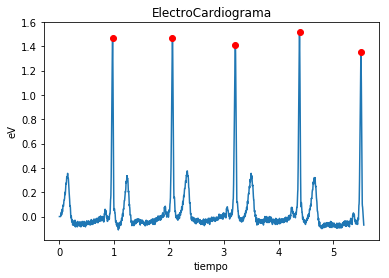

Se obtuvieron los siguientes intervalos entre pico y pico
 [1.0916666666666663, 1.1472222222222221, 1.1722222222222234, 1.1194444444444436] 

La frecuencia promedio es  53.011230800844885
Ingrese sexo del paciente (M)asculino/(F)emenino: m
M
Ingrese edad del paciente: 50
50.0
Ingrese el peso del paciente en kg: 70
70.0
Fmax=  188.3 
Porcentaje de la frecuencia dada respecto a Fmax:  28.15253892769245 %
Paciente durmiendo

Ingrese "SI" si desea seguir realizando pruebas con diferentes datos
Ingrese cualquier otro dato para detener las pruebas
 si
Ingrese sexo del paciente (M)asculino/(F)emenino: m
M
Ingrese edad del paciente: 90
90.0
Ingrese el peso del paciente en kg: 90
90.0
Fmax=  168.1 
Porcentaje de la frecuencia dada respecto a Fmax:  31.53553289758768 %
Paciente en reposo

Ingrese "SI" si desea seguir realizando pruebas con diferentes datos
Ingrese cualquier otro dato para detener las pruebas
 si
Ingrese sexo del paciente (M)asculino/(F)emenino: f
F
Ingrese edad del paciente: 90


In [6]:
#Leo el excel y lo guardo en la variable File
File=pd.read_excel("electrocardiograma.xlsx")

xEC=list()  #Datos del Eje X del grafico
yEC=list()  #Datos del Eje Y del grafico


#Se guarda en el eje X los valores de tiempo
for i in range(len(File['señal'])):
    #Guardo la informacion del indice x del archivo en una variable auxiliar
    aux=File.loc[i]
    #Le agrego al eje Y el indice i de la columna de señales
    yEC.append(aux['señal']) 
    #Le agrego al eje X el indice i de la columna de tiempo
    xEC.append(aux['tiempo'])  

#Se preparan los graficos de la señal, la deteccion de picos y guardamos la cantidad de picos leidos en una variable
#para asegurar que no hayan picos escondidos uno cerca del otro
ploteo(xEC,yEC,0,xl='tiempo',yl='eV',tl='ElectroCardiograma')
picos=pk_plot(yEC,xEC,1)
    
plt.show()

#Creamos una lista donde se guardaran todos los intervalos
periodo=list()

#Se itera el for por la cantidad de elementos en "picos" - 1 
for p in range(len(picos)-1):
    p1=xEC[picos[p]]    #p1 es el tiempo inicial del intervalo
    p2=xEC[picos[p+1]]  #p2 es el tiempo final del intervalo
    dif=p2-p1           #Calculo la distancia de del intervalo restando p1 de p2
    periodo.append(dif) #Agrego el valor en la lista periodos

# imprimimos los intervalos obtenidos
print("Se obtuvieron los siguientes intervalos entre pico y pico\n",periodo,'\n')

#Llamamos la funcion F_Car para calcular la frecuencia cardiaca promedio
F_Prom=F_Car(periodo)
print("La frecuencia promedio es ",F_Prom)

mas='SI'
while mas=='SI':
    sexo=GGD('sexo')
    print(sexo)
    edad=GGD('edad')
    print(edad)
    peso=GGD('peso')
    print(peso)

    actividad=estado(F_Prom,sexo,edad,peso,1)
    print(actividad)

    with open('Analisis.txt','a+') as analisis:
        #Preparamos una string con la informacion que queremos guardar en el archivo con el siguiente formato:
        #Analisis c_analisis
        #Sexo: sexo
        #Edad: edad
        #Peso: peso
        #Frecuencia cardiaca: F_Prom
        #Estado del paciente durante la medición: actividad
        escritura="Analisis "
        escritura+="\nSexo: "+ sexo
        escritura+="\nEdad: "+ str(int(edad))
        escritura+="\nPeso: "+str(peso)
        escritura+="\nFrecuencia cardiaca: "+str("%.2f" %F_Prom)
        escritura+="\nEstado del paciente durante la medición: "+actividad+"\n\n"
        
        #Escribo en el archivo el contenido de escritura
        analisis.write(escritura)
    mas=input("\nIngrese \"SI\" si desea seguir realizando pruebas con diferentes datos\nIngrese cualquier otro dato para detener las pruebas\n ")
    mas=mas.upper()
    if mas=='420' or mas=='69': 
        print('Jaja Nice')
        mas='SI'
    elif mas=='never gonna give you up':
        print('never gonna let you down')
        mas='SI'
    if not(mas=='SI'):
        print('Fin del programa')